In [69]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.python.keras.applications import vgg16
from tensorflow.python.keras.applications import vgg19
from tensorflow.python.keras.applications import xception
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import pandas as pd
from tqdm import tqdm 
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [9]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255.,
                                 rotation_range=360,
                                 width_shift_range = 0.1,
                                 height_shift_range = 0.1,
                                 shear_range=0.2,
                                 #zoom_range=0.2,
                                 horizontal_flip=True,
                                 vertical_flip=True)

# Note that the validation data should not be augmented!
validation_datagen = ImageDataGenerator(rescale=1./255.)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150, 150),)
                                                   #color_mode="grayscale")

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                      batch_size=10,
                                                      class_mode='binary',
                                                      target_size=(150, 150),)#color_mode="grayscale")

Found 689 images belonging to 4 classes.
Found 561 images belonging to 4 classes.


(50, 150, 1500, 3)


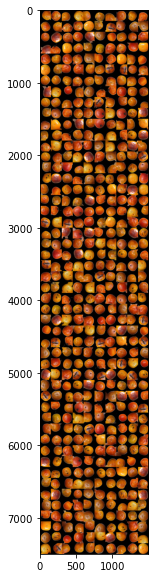

In [10]:
np.random.seed(15)
 

iterations = 50
images = []
    
for i in enumerate(range(iterations)):
    img,label = validation_generator.next()
    n_img = len(label)
    base = cv2.cvtColor(img[0], cv2.COLOR_RGB2BGR)  # keras는 RGB, openCV는 BGR이라 변경함
    for idx in range(n_img - 1):
        img2 = cv2.cvtColor(img[idx + 1], cv2.COLOR_RGB2BGR)
        base = np.hstack((base, img2))
    images.append(base)
img = images[0]
for idx in range(len(images) - 1):
    img = np.vstack((img, images[idx + 1]))
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
fig = plt.figure(figsize=(30,10))
plt.imshow(img)
print(np.shape(images))

In [59]:
def image_augmentation( base_dir = 'C:/Users/sdf80/Desktop/data/fruit_classification/fruit2/',
                        train_test_dir_ = 'train',
                        normal_dir_ = 'Renew_Front_side_of_Normal_fruit',
                        bad_dir_ = 'Renew_Front_side_of_Bad_fruit',
                        image_name='aug_data', 
                        iterations = 5,
                        batch_size = 5,
                        rotation_range_=0,
                        width_shift_range_ = 0.0,
                        height_shift_range_ = 0.0,
                        shear_range_=0.0,
                        horizontal_flip_=False,
                        vertical_flip_=False,
                        IsWriteImage = True,
                        IsShowImage= False):
    
    train_test_dir = os.path.join(base_dir, train_test_dir_)
    normal_dir = os.path.join(train_test_dir, normal_dir_)
    bad_dir = os.path.join(train_test_dir, bad_dir_)
    
    datagen = ImageDataGenerator(rescale=1./255.,
                                 rotation_range=rotation_range_,
                                 width_shift_range = width_shift_range_,
                                 height_shift_range = height_shift_range_,
                                 shear_range=shear_range_,
                                 #zoom_range=0.2,
                                 horizontal_flip=horizontal_flip_,
                                 vertical_flip=vertical_flip_)
    generator = datagen.flow_from_directory(train_test_dir,
                                            batch_size=batch_size,
                                            class_mode='binary',
                                            target_size=(150, 150))
    images = []
    for i in range(iterations):
        img, label = generator.next()
        #if(len(label) == iterations):
        if(IsShowImage):        
            n_img = len(label)
            base = cv2.cvtColor(img[0], cv2.COLOR_RGB2BGR)
            for idx in range(n_img - 1):
                img2 = cv2.cvtColor(img[idx + 1], cv2.COLOR_RGB2BGR)
                base = np.hstack((base, img2))
            images.append(base)
        if(IsWriteImage): 
            img = img * 255
            for j in range(len(label)):
                k = i + j
                if (label[j] == 1):
                    final_img = cv2.cvtColor(img[j], cv2.COLOR_RGB2BGR)
                    data_dir = os.path.join(normal_dir, f'{image_name}_{k}.jpg')
                    cv2.imwrite(data_dir, final_img)
                else:
                    final_img = cv2.cvtColor(img[j], cv2.COLOR_RGB2BGR)
                    data_dir = os.path.join(bad_dir, f'{image_name}_{k}.jpg')
                    cv2.imwrite(data_dir, final_img)
        
    if(IsShowImage):
        img = images[0]
        for idx in range(len(images) - 1):
            img = np.vstack((img, images[idx + 1]))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        fig = plt.figure(figsize=(30,10))
        plt.imshow(img)

In [70]:
def image_augmentation( old_base_dir = 'C:/Users/sdf80/Desktop/fruit_dataset_augmentation/TotalClass/old/',
                        new_base_dir = 'C:/Users/sdf80/Desktop/fruit_dataset_augmentation/TotalClass/new/',
                        old_dir = 'FrontNormal',
                        new_dir = 'FrontNormal',
                        image_name='FrontNormal', 
                        iterations = 10,
                        batch_size = 5,
                        rotation_range_=0,
                        width_shift_range_ = 0.0,
                        height_shift_range_ = 0.0,
                        shear_range_=0.0,
                        horizontal_flip_=False,
                        vertical_flip_=False,
                        IsWriteImage = True,
                        IsShowImage= False, k = 1):
    
    full_old_dir = os.path.join(old_base_dir, old_dir)
    full_new_dir = os.path.join(new_base_dir, new_dir)
    
    datagen = ImageDataGenerator(rescale=1./255.,
                                 rotation_range=rotation_range_,
                                 width_shift_range = width_shift_range_,
                                 height_shift_range = height_shift_range_,
                                 shear_range=shear_range_,
                                 #zoom_range=0.2,
                                 horizontal_flip=horizontal_flip_,
                                 vertical_flip=vertical_flip_)
    # class_mode=None 일 경우 파일 단위로 데이터가 있어야하고 1개 클래스로는 생성 불가 파일 최소 2개 이상
    generator = datagen.flow_from_directory(full_old_dir,
                                            batch_size=batch_size,
                                            class_mode=None,
                                            target_size=(160, 160))
    images = []
    for i in range(iterations):
        img = generator.next()
        #if(len(label) == iterations):
        if(IsShowImage):        
            n_img = len(img)
            base = cv2.cvtColor(img[0], cv2.COLOR_RGB2BGR)
            for idx in range(n_img - 1):
                img2 = cv2.cvtColor(img[idx + 1], cv2.COLOR_RGB2BGR)
                base = np.hstack((base, img2))
            images.append(base)
        if(IsWriteImage): 
            img = img * 255
            for j in range(len(img)):
                final_img = cv2.cvtColor(img[j], cv2.COLOR_RGB2BGR)
                data_dir = os.path.join(full_new_dir, f'{image_name}.{k}.jpg')
                cv2.imwrite(data_dir, final_img)
                k= k+1
        
    if(IsShowImage):
        img = images[0]
        for idx in range(len(images) - 1):
            img = np.vstack((img, images[idx + 1]))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        fig = plt.figure(figsize=(30,10))
        plt.imshow(img)

Found 34 images belonging to 1 classes.


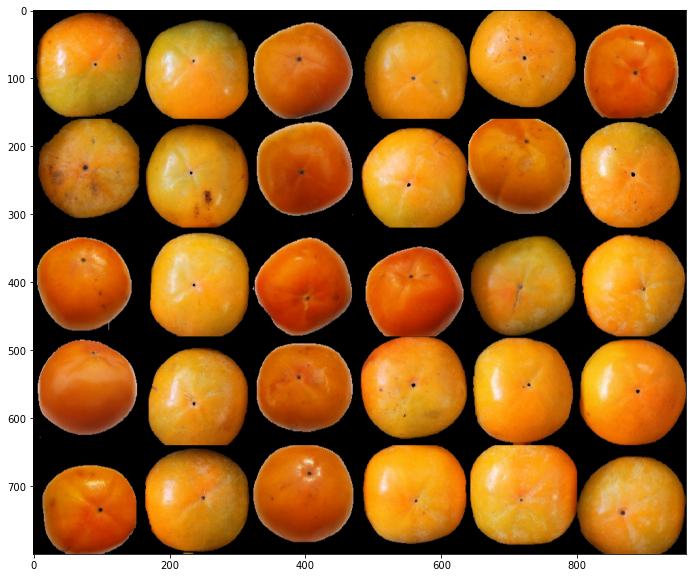

In [78]:
image_augmentation( iterations = 5,
                        batch_size = 6,
                        height_shift_range_ = 0.1,
                        shear_range_=0.1,
                        IsWriteImage = True,
                        IsShowImage= True)

In [16]:
image_augmentation(train_test_dir_ = 'train',image_name='aug_width_data',
                        iterations = 30,
                        batch_size = 20,
                        rotation_range_=360,
                        width_shift_range_ = 0.1,
                        horizontal_flip_=True,
                        vertical_flip_=True)

Found 689 images belonging to 4 classes.


In [22]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=10,
    epochs=20,
)

Epoch 1/20
10/10 [==============================] - 40s 4s/step - loss: -110.8197 - accuracy: 0.4750 - val_loss: 0.7371 - val_accuracy: 0.4777
Epoch 2/20
10/10 [==============================] - 36s 4s/step - loss: -16.3227 - accuracy: 0.4868 - val_loss: 1.1154 - val_accuracy: 0.4528
Epoch 3/20
10/10 [==============================] - 38s 4s/step - loss: -255.1779 - accuracy: 0.4900 - val_loss: 45017.2539 - val_accuracy: 0.4777
Epoch 4/20
10/10 [==============================] - 37s 4s/step - loss: -326.2798 - accuracy: 0.3900 - val_loss: 21205.6602 - val_accuracy: 0.4777
Epoch 5/20
10/10 [==============================] - 37s 4s/step - loss: 374.2617 - accuracy: 0.5132 - val_loss: 13518.5068 - val_accuracy: 0.4528
Epoch 6/20
10/10 [==============================] - 36s 4s/step - loss: 10.7913 - accuracy: 0.6138 - val_loss: 84650.1250 - val_accuracy: 0.4777
Epoch 7/20
10/10 [==============================] - 38s 4s/step - loss: -29.0489 - accuracy: 0.6400 - val_loss: 2021.5695 - val_ac

In [38]:
import pandas as pd
test_fnames2 = os.listdir(base_dir + 'test/MixData_File')
test_df=pd.DataFrame( {"filename":test_fnames2} )      
test_df

,filename
0,f0.jpg
1,f1.jpg
2,f10.jpg
3,f11.jpg
4,f12.jpg
...,...
75,f77.jpg
76,f78.jpg
77,f79.jpg
78,f8.jpg


In [50]:
nbsamples=test_df.shape[0]

test_dir = os.path.join(base_dir, 'test/MixData_File')
test_datagen=ImageDataGenerator(rescale=1./255)
# 테스트 이미지니까, 사진 그대로 씀
test_generator=test_datagen.flow_from_dataframe(
    test_df,
    base_dir+"test/MixData_File",
    x_col= "filename",
    y_col= None,
    target_size = (150, 150),
    class_mode = None,
    batch_size = 20,
    shuffle = True)



Found 80 validated image filenames.


In [51]:
a, _ = next(test_generator)
print(a)
print(_)

ValueError: too many values to unpack (expected 2)

In [52]:
predict=model.predict(test_generator, 
                                steps=nbsamples/20)
                                
test_df['category']=np.argmax(predict, axis=1)

In [53]:
predict

array([[1.00000000e+00],
       [4.94764618e-10],
       [4.87899221e-10],
       [5.97537337e-07],
       [8.31201632e-08],
       [3.25161620e-10],
       [3.51763979e-10],
       [8.36220636e-07],
       [4.03045625e-10],
       [3.47355957e-08],
       [2.39960096e-09],
       [1.00000000e+00],
       [2.99741537e-10],
       [1.18779575e-09],
       [4.51147422e-08],
       [4.60048142e-08],
       [3.35518557e-10],
       [6.07926777e-05],
       [4.10207335e-09],
       [3.81005583e-09],
       [1.75217103e-08],
       [2.73939577e-07],
       [1.00000000e+00],
       [2.70175970e-09],
       [1.49270477e-06],
       [3.16030868e-10],
       [2.76466322e-10],
       [1.00000000e+00],
       [3.88820282e-10],
       [3.27881500e-09],
       [3.38652217e-10],
       [2.80327150e-10],
       [2.53986859e-10],
       [1.42617695e-08],
       [3.19711035e-10],
       [2.06261652e-09],
       [1.02701299e-20],
       [1.13248771e-05],
       [3.91471133e-07],
       [2.32704092e-10],


In [54]:
test_df.to_csv("category.csv")

In [19]:
model.get_weights()

[array([[[[ 2.45231166e-02, -7.70713985e-02,  1.03165574e-01,
           -6.55703023e-02, -1.04843127e-02, -3.94462608e-02,
           -9.99778658e-02,  1.32286668e-01,  1.79808438e-02,
            1.19793460e-01,  1.44223377e-01,  7.04989061e-02,
            4.28165421e-02, -2.25489195e-02, -2.07535047e-02,
           -1.30901530e-01,  8.60514045e-02,  1.01023680e-02,
            7.34650642e-02, -6.41439557e-02,  1.05786964e-01,
            5.55117652e-02, -8.45994242e-03,  1.28902555e-01,
            1.11988736e-02,  5.88498786e-02, -1.29081041e-01,
            2.00807285e-02, -5.07136248e-02, -9.47338194e-02,
           -6.79286122e-02,  7.62068778e-02],
          [ 5.74425608e-02,  5.74149713e-02, -2.96167415e-02,
           -2.56553497e-02,  1.79593861e-02,  1.31183401e-01,
            5.91420941e-02,  1.28395468e-01,  5.94079308e-02,
           -9.93656889e-02, -1.43027632e-02, -3.31706330e-02,
            7.23303109e-02,  4.10412736e-02, -8.34055152e-03,
           -1.27912551e-

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

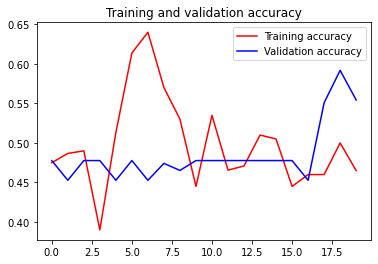

<Figure size 432x288 with 0 Axes>

In [32]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

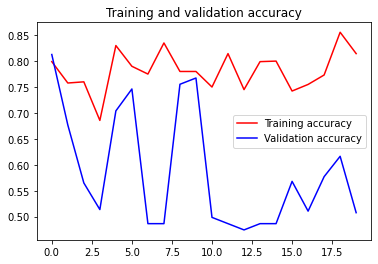

<Figure size 432x288 with 0 Axes>

In [80]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

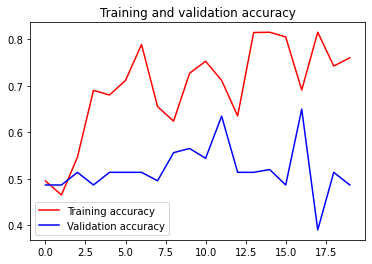

<Figure size 432x288 with 0 Axes>

In [72]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

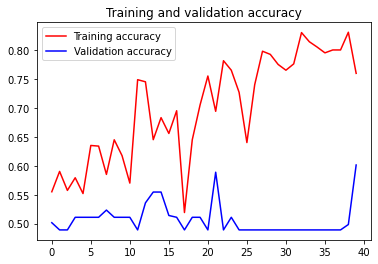

<Figure size 432x288 with 0 Axes>

In [55]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

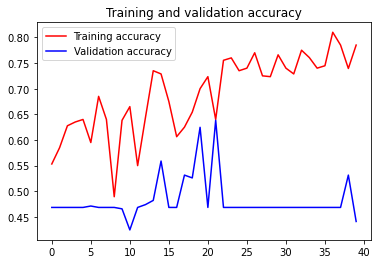

<Figure size 432x288 with 0 Axes>

In [12]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

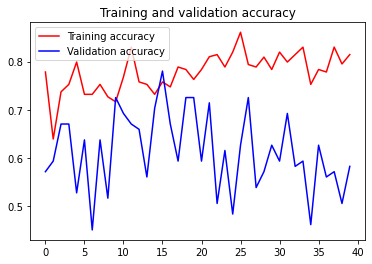

<Figure size 432x288 with 0 Axes>

In [113]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [117]:
pre_trained_model2 = vgg16.VGG16(input_shape=(150,150,3),include_top=False, weights=None)

In [120]:
pre_trained_model2.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [127]:
last_layer2 = pre_trained_model2.get_layer('block5_pool')
print('last layer output shape: ', last_layer2.output.shape)
last_output2 = last_layer2.output

last layer output shape:  (None, 4, 4, 512)


In [130]:
x = layers.Flatten()(last_output2)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(1, activation='sigmoid')(x)

model2 = Model(pre_trained_model2.input, x)

In [131]:
model2.compile(optimizer=RMSprop(lr=0.001),
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [132]:
history = model2.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=10,
    epochs=60,
)

Epoch 1/60
10/10 [==============================] - 73s 7s/step - loss: 4760.1323 - accuracy: 0.5773 - val_loss: 0.7282 - val_accuracy: 0.5934
Epoch 2/60
10/10 [==============================] - 73s 7s/step - loss: 0.7042 - accuracy: 0.6392 - val_loss: 0.6768 - val_accuracy: 0.5934
Epoch 3/60
10/10 [==============================] - 73s 7s/step - loss: 0.6565 - accuracy: 0.6495 - val_loss: 0.6823 - val_accuracy: 0.5934
Epoch 4/60
10/10 [==============================] - 74s 7s/step - loss: 0.6712 - accuracy: 0.6082 - val_loss: 0.6769 - val_accuracy: 0.5934
Epoch 5/60
10/10 [==============================] - 73s 7s/step - loss: 0.6646 - accuracy: 0.6340 - val_loss: 0.6771 - val_accuracy: 0.5934
Epoch 6/60
10/10 [==============================] - 75s 8s/step - loss: 0.6597 - accuracy: 0.6400 - val_loss: 0.6912 - val_accuracy: 0.5934
Epoch 7/60
10/10 [==============================] - 73s 7s/step - loss: 0.6540 - accuracy: 0.6289 - val_loss: 0.6788 - val_accuracy: 0.5934
Epoch 8/60
10/10 

KeyboardInterrupt: 

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

In [ ]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()